In [65]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt   
import statsmodels.formula.api as sm
import seaborn as sns
import datetime
import time
from time import strftime, gmtime
import statsmodels.formula.api as smf
import glob
import os
import string

from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels


from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from random import sample
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.0f}'.format

In [66]:
df=pd.read_csv('model_data1.csv')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18196559 entries, 0 to 18196558
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   OP_CARRIER           int64  
 1   ORIGIN               int64  
 2   DEST                 int64  
 3   DEP_DELAY            float64
 4   TAXI_OUT             float64
 5   CARRIER_DELAY        float64
 6   WEATHER_DELAY        float64
 7   NAS_DELAY            float64
 8   LATE_AIRCRAFT_DELAY  float64
 9   Delay                int64  
dtypes: float64(6), int64(4)
memory usage: 1.4 GB


In [68]:
df.head()

,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,LATE_AIRCRAFT_DELAY,Delay
0,4,99,189,0,0,0,0,0,0,0
1,4,21,139,0,0,0,0,0,0,0
2,4,189,21,0,0,0,0,0,0,0
3,4,317,21,0,0,0,0,0,0,0
4,4,57,234,0,0,0,0,0,0,1


# Split Data into Testing & Training Set

In [69]:
data = df.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

# All Model Functions

In [72]:
# features = df[df.columns.drop(['Delay'])].values
# target = df['Delay'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

In [91]:
colors = ['#F93822','#FDD20E']
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import plot_roc_curve
from scikitplot.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score,f1_score


In [95]:
def model(classifier):
    
    classifier.fit(X_train,y_train)
    prediction = classifier.predict(X_test)
    probs = classifier.predict_proba(X_test)
    probs = probs[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
    auc = metrics.roc_auc_score(y_test, probs)*100
    auc_score = roc_auc_score(y_test,prediction)
    
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("ROC_AUC Score : ",'{0:.2%}'.format(auc_score))
    print("Recall: ",'{0:.2%}'.format(recall_score(y_test, prediction)))
    print("Precision: ",'{0:.2%}'.format(precision_score(y_test, prediction)))
    print("F1-score: ",'{0:.2%}'.format(f1_score(y_test, prediction)))
    
    plt.plot(fpr,tpr,label="ROC_AUC Score: "+'{0:.2%}'.format(auc_score))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    
#     cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 1,random_state = 1)
#     print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
#     plot_roc(classifier, X_test,y_test)
#     plt.title('ROC_AUC_Plot')
#     plt.show()

def model_evaluation(classifier):
    
#     # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value*100) for value in (cm.flatten()/np.sum(cm))]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,fmt='')
#     sns.heatmap(confusion_matrix(y_test, classifier.predict(X_test)), annot=True, fmt='.0f')
#     plt.title("Random Forest Confusion Matrix", fontsize=18)

    # Classification Report
    print(classification_report(y_test,classifier.predict(X_test)))

# Logistic Regression

Accuracy :  86.64%
ROC_AUC Score :  82.91%
Recall:  70.56%
Precision:  88.84%
F1-score:  78.65%


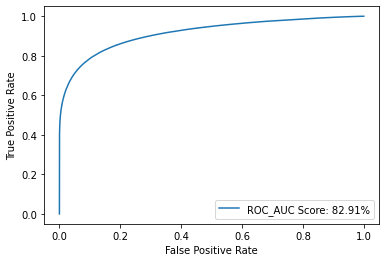

In [93]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 
model(classifier_lr)

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90   3555704
         1.0       0.89      0.71      0.79   1903264

    accuracy                           0.87   5458968
   macro avg       0.87      0.83      0.84   5458968
weighted avg       0.87      0.87      0.86   5458968



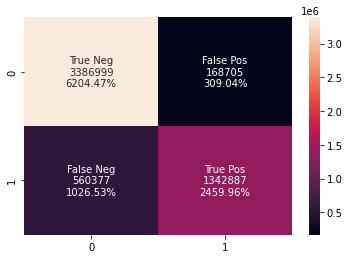

In [96]:
model_evaluation(classifier_lr)

# Decision Tree

Accuracy :  86.66%
ROC_AUC Score :  83.58%
Recall:  73.41%
Precision:  86.28%
F1-score:  79.33%


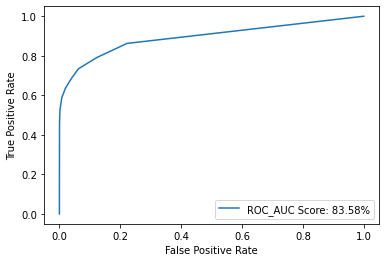

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90   3555704
         1.0       0.86      0.73      0.79   1903264

    accuracy                           0.87   5458968
   macro avg       0.87      0.84      0.85   5458968
weighted avg       0.87      0.87      0.86   5458968



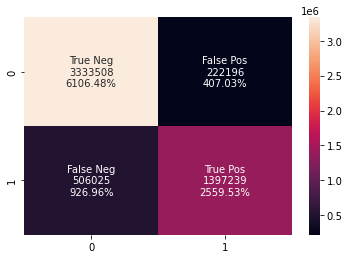

In [97]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
model(classifier_dt)
model_evaluation(classifier_dt)

# Random Forest Classifier

Accuracy :  86.92%
ROC_AUC Score :  84.21%
Recall:  75.24%
Precision:  85.51%
F1-score:  80.05%


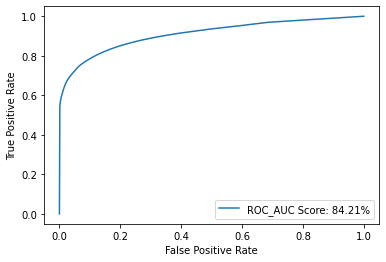

In [99]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=100)
model(classifier_rf) 

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90   3555704
         1.0       0.86      0.75      0.80   1903264

    accuracy                           0.87   5458968
   macro avg       0.87      0.84      0.85   5458968
weighted avg       0.87      0.87      0.87   5458968



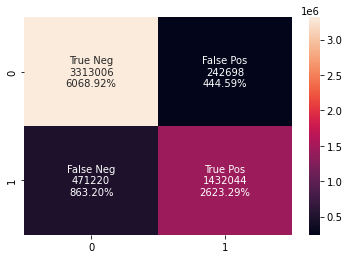

In [100]:
model_evaluation(classifier_rf)

# Naive Bayes

Accuracy :  79.60%
ROC_AUC Score :  70.84%
Recall:  41.88%
Precision:  99.08%
F1-score:  58.88%


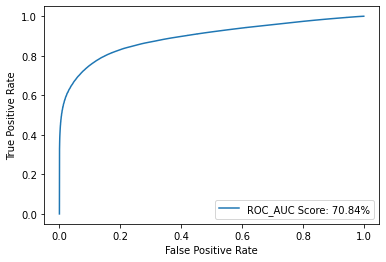

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86   3555704
         1.0       0.99      0.42      0.59   1903264

    accuracy                           0.80   5458968
   macro avg       0.88      0.71      0.73   5458968
weighted avg       0.84      0.80      0.77   5458968



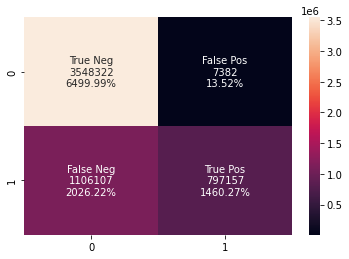

In [98]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
model(clf)
model_evaluation(clf)

# Important Features 

In [51]:
col=df.loc[:, df.columns != 'Delay'].columns
feature_importances = pd.Series(classifier_rf.feature_importances_, col)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind = "barh",figsize = (7,6))

<AxesSubplot:>

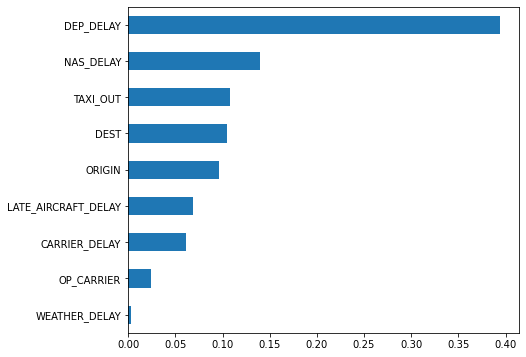

Top 3 Most Important Feature: Departure Delay, Nas Delay and Taxi Out

# END